# 1) Dealing with Missing Data

In [ ]:
# Import Python Libraries

import numpy as np
import pandas as pd

In [ ]:
#Read the dataset

house_data = pd.read_csv("house_prices.csv")

In [ ]:
#Check the first 5 rows in the dataset

house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
#Check for missing data

house_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
house_data_with_missingdata = house_data.copy()

In [ ]:
house_data_without_missingdata = house_data.dropna()

In [ ]:
#Check the total no of data with missing values

house_data_with_missingdata.shape

(13320, 9)

In [ ]:
#Check the total no of data without missing values

house_data_without_missingdata.shape

(7496, 9)

In [ ]:
#Calculate percentage of missing data

missing_percent = (house_data.isnull().mean() * 100).round(2)
missing_percent = missing_percent[missing_percent > 0]

print(missing_percent.round)

<bound method Series.round of location     0.01
size         0.12
society     41.31
bath         0.55
balcony      4.57
dtype: float64>


# Categorizing Missing Data with Reasons

MAR - Missing At Random

MCAR - Missing Completely At Random

MNAR - Missing Not At Random

In [ ]:
#Define categories and reasons

missing_info = {
    "location": {
        "category": "MCAR",
        "reason": "Only 1 missing value; likely due to random entry issue, no pattern."
    },
    "size": {
        "category": "MAR",
        "reason": "Missingness may depend on area type or total squarefeet. Predictable from other data."
    },
    "bath": {
        "category": "MAR",
        "reason": "Likely depends on property size; not random but explainable from features like size."
    },
    "society": {
        "category": "MNAR",
        "reason": "Very high missing rate. Likely not disclosed for low-cost or under-construction projects."
    },
    "balcony": {
        "category": "MNAR",
        "reason": "May reflect deliberate non-reporting when no balcony exists."
    }
}

In [ ]:
#Build DataFrame

house_data = []
for col in missing_percent.index:
    house_data.append({
        "Column": col,
        "Missing %": f"{missing_percent[col]}",
        "Category": missing_info[col]["category"],
        "Reason": missing_info[col]["reason"]
    })

missing_summary = pd.DataFrame(house_data)

In [ ]:
#Print table header and display result

print(f"{'Column':<10} {'Missing %':<10} {'Category':<8} Reason")

for row in house_data:
    print(f"{row['Column']:<10} {row['Missing %']:<10} {row['Category']:<8} {row['Reason']}")

Column     Missing %  Category Reason
location   0.01       MCAR     Only 1 missing value; likely due to random entry issue, no pattern.
size       0.12       MAR      Missingness may depend on area type or total squarefeet. Predictable from other data.
society    41.31      MNAR     Very high missing rate. Likely not disclosed for low-cost or under-construction projects.
bath       0.55       MAR      Likely depends on property size; not random but explainable from features like size.
balcony    4.57       MNAR     May reflect deliberate non-reporting when no balcony exists.


# 2) Data Aggregation and Grouping

In [ ]:
covid_data = pd.read_csv("Covid19_data.csv")

covid_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
covid_data.shape

(884737, 6)

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    884737 non-null  object 
 1   county  884737 non-null  object 
 2   state   884737 non-null  object 
 3   fips    876471 non-null  float64
 4   cases   884737 non-null  int64  
 5   deaths  865976 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.5+ MB


In [ ]:
covid_data.isnull().sum()

date          0
county        0
state         0
fips       8266
cases         0
deaths    18761
dtype: int64

In [ ]:
#Average number of covid cases by state.

#Group by state and calculate average number of cases

avg_cases_by_state = covid_data.groupby("state")["cases"].mean()

print(avg_cases_by_state.round().head())

state
Alabama        1701.0
Alaska          431.0
Arizona       10718.0
Arkansas        869.0
California    10414.0
Name: cases, dtype: float64


SUMMARY:

I used grouping and aggregation to efficiently calculate the average number of COVID-19 cases reported per state. This was achieved by grouping the dataset by the 'state' column and computing the mean of the 'cases' for each group. The resulting summary displays the average case count for each state over the entire time period covered in the dataset. This type of aggregation is valuable for identifying regional trends, comparing the pandemic's impact across states, and supporting data-driven decision-making.

# 3) Time Series Analysis

In [ ]:
#Convert the date column to a datetime object.

covid_data['date'] = pd.to_datetime(covid_data['date'])

print(covid_data[['date']].head())

        date
0 2020-01-21
1 2020-01-22
2 2020-01-23
3 2020-01-24
4 2020-01-24


In [ ]:
print(covid_data.dtypes['date'])

datetime64[ns]


In [ ]:
#Visualize the monthly COVID cases for one state

import matplotlib.pyplot as plt

In [ ]:
#Filter for state - Illinois

state_column = covid_data[covid_data['state'] == 'Illinois']

In [ ]:
#Create a copy of the original DataFrame

state_column_copy = state_column.copy()

#Extract the month from the 'date' column

state_column_copy.loc[:, 'month_name'] = state_column_copy['date'].dt.month_name()

In [ ]:
#Create a categorical type to ensure correct month order

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

state_column_copy['month_name'] = pd.Categorical(state_column_copy['month_name'],
                                                  categories=month_order, ordered=True)

In [ ]:
#Group by month and sum the cases

monthly_cases = state_column_copy.groupby('month_name')['cases'].sum()

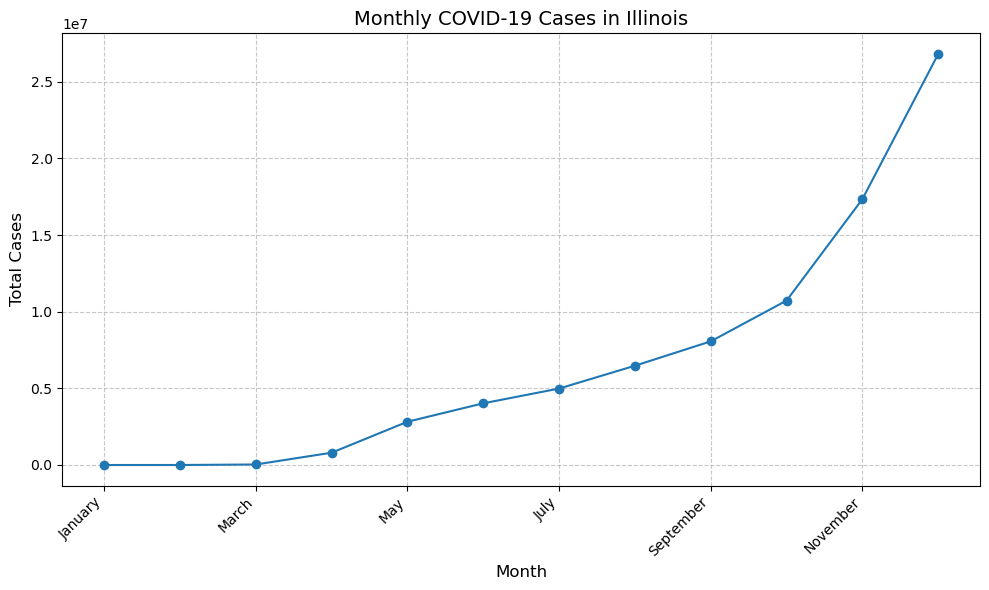

In [ ]:
#Plot the data

plt.figure(figsize=(10, 6))
monthly_cases.plot(marker='o')
plt.title("Monthly COVID-19 Cases in Illinois", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)

plt.xticks(rotation=45, ha='right')


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
